In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [58]:
alg_list = []
thread_list = []
ur_list = []
size_list = []
throughput_list = []

In [59]:
with open("output5.txt", "r") as file:
    for line in file:
        parts = line.split()
        if len(parts) == 11:
            alg_list.append(parts[1])
            thread_list.append(int(parts[3]))
            ur_list.append(int(parts[5]))
            size_list.append(int(parts[7]))
            throughput_list.append(float(parts[10]))

In [60]:
data = {
    'ALG': alg_list,
    'THREAD': thread_list,
    'UR': ur_list,
    'SIZE': size_list,
    'Throughput (ops/s)': throughput_list
}

df = pd.DataFrame(data)

In [61]:
# pd.set_option('display.max_rows', len(df))
# print(df)
# pd.reset_option('display.max_rows')

In [62]:
# df["Throughput (ops/s)"][10]

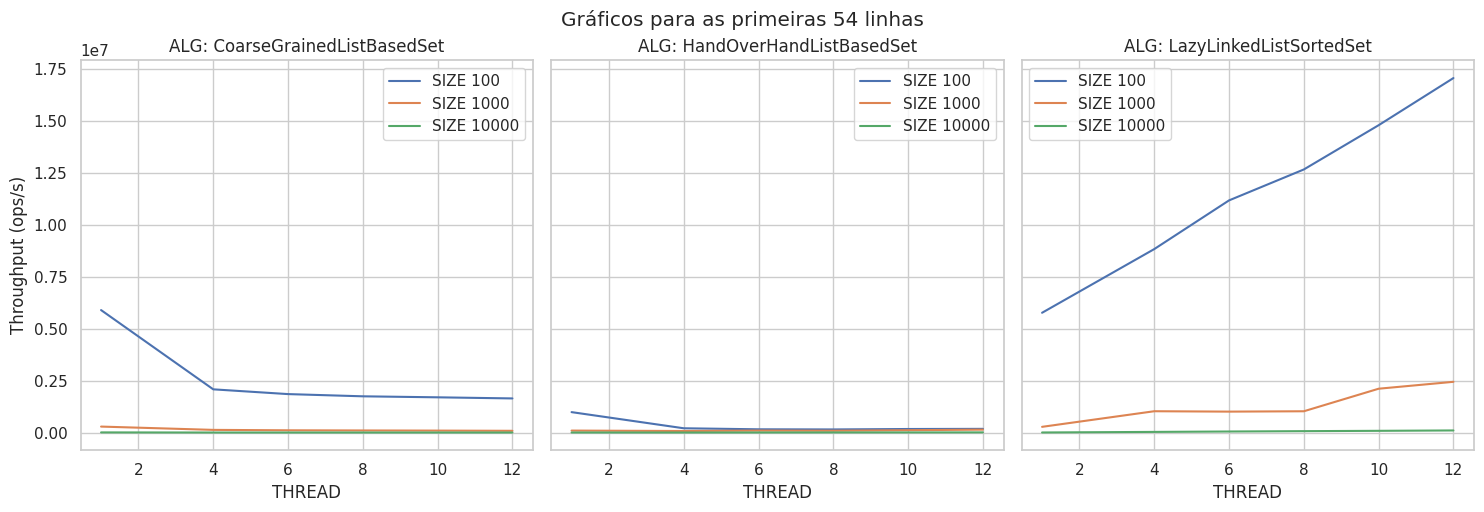

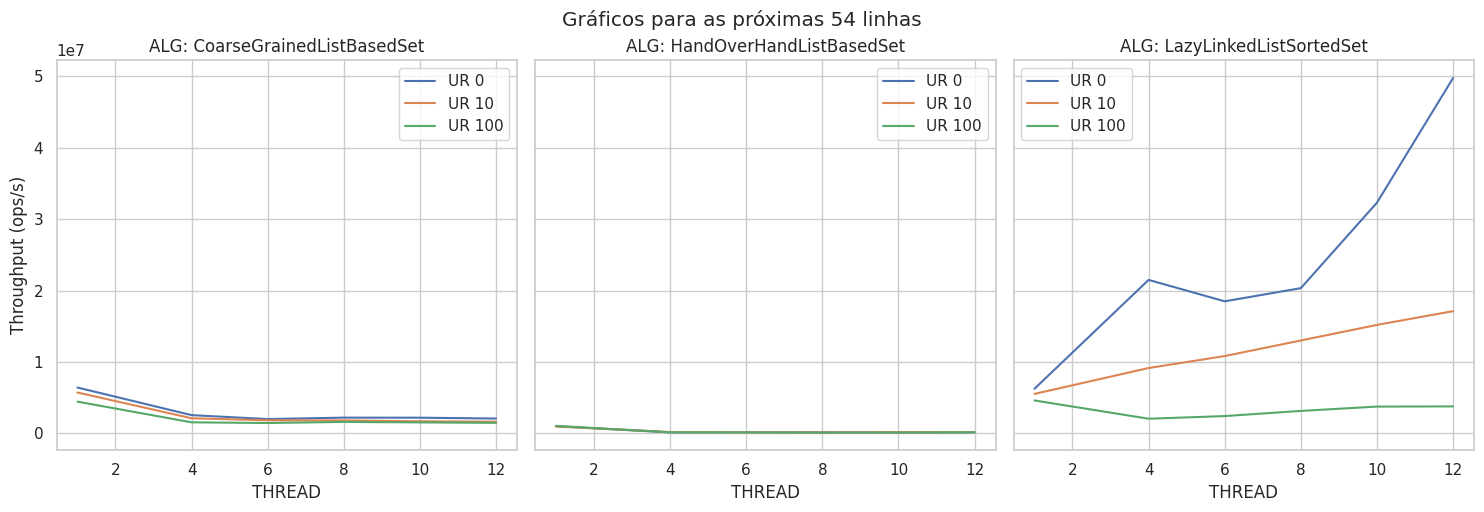

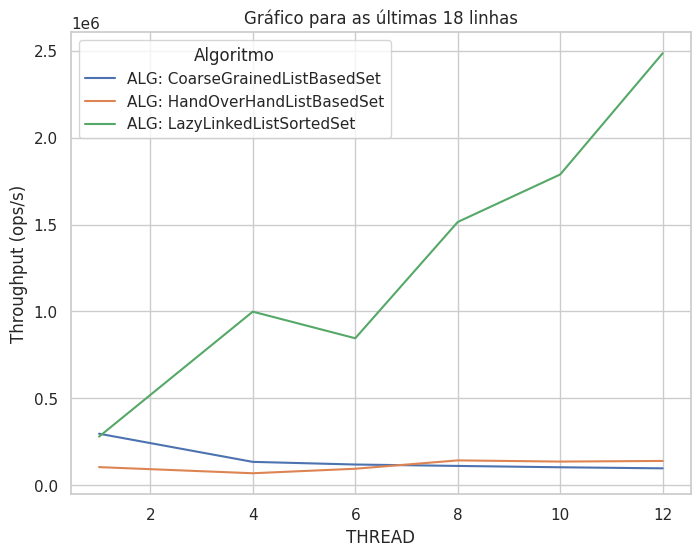

In [63]:
# Defina os parâmetros de estilo do seaborn
sns.set(style="whitegrid")

# Separe o DataFrame em três partes com base nos índices especificados
df1 = df[:54]  # Linhas 0 a 53
df2 = df[54:108]  # Linhas 54 a 107
df3 = df[108:]  # Linhas 108 a 125

# Crie uma figura com subplots para os 3 gráficos da primeira seção
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

for i, alg in enumerate(df1['ALG'].unique()):
    data = df1[df1['ALG'] == alg]
    for size in data['SIZE'].unique():
        sub_data = data[data['SIZE'] == size]
        sns.lineplot(data=sub_data, x='THREAD', y='Throughput (ops/s)', ax=axes[i], label=f'SIZE {size}')
    axes[i].set_title(f'ALG: {alg}')
    axes[i].set_xlabel('THREAD')
    axes[i].set_ylabel('Throughput (ops/s)')

plt.tight_layout()
plt.suptitle('Gráficos para as primeiras 54 linhas', y=1.02)
plt.show()

# Crie uma figura com subplots para os 3 gráficos da segunda seção
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

for i, alg in enumerate(df2['ALG'].unique()):
    data = df2[df2['ALG'] == alg]
    for ur in data['UR'].unique():
        sub_data = data[data['UR'] == ur]
        sns.lineplot(data=sub_data, x='THREAD', y='Throughput (ops/s)', ax=axes[i], label=f'UR {ur}')
    axes[i].set_title(f'ALG: {alg}')
    axes[i].set_xlabel('THREAD')
    axes[i].set_ylabel('Throughput (ops/s)')

plt.tight_layout()
plt.suptitle('Gráficos para as próximas 54 linhas', y=1.02)
plt.show()

# Crie um gráfico para a terceira seção
fig, ax = plt.subplots(figsize=(8, 6))

for alg in df3['ALG'].unique():
    data = df3[df3['ALG'] == alg]
    sns.lineplot(data=data, x='THREAD', y='Throughput (ops/s)', label=f'ALG: {alg}')

ax.set_title('Gráfico para as últimas 18 linhas')
ax.set_xlabel('THREAD')
ax.set_ylabel('Throughput (ops/s)')
plt.legend(title='Algoritmo')
plt.show()


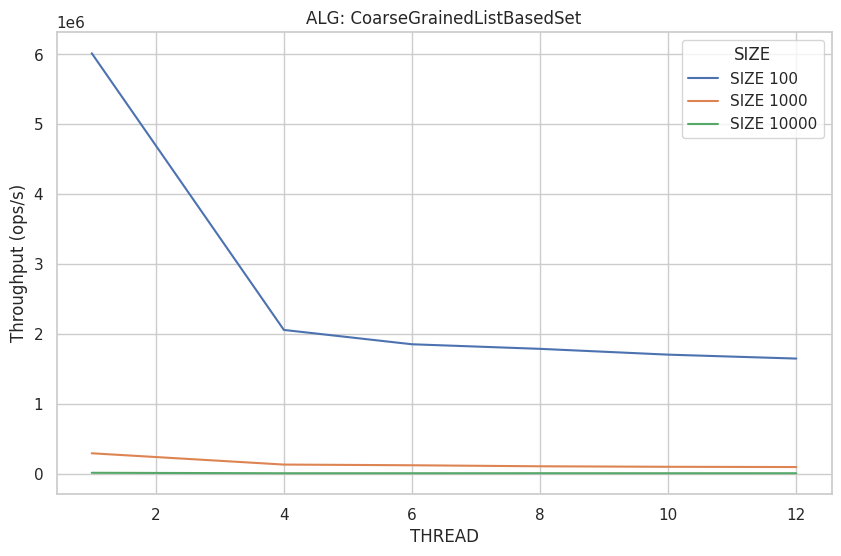

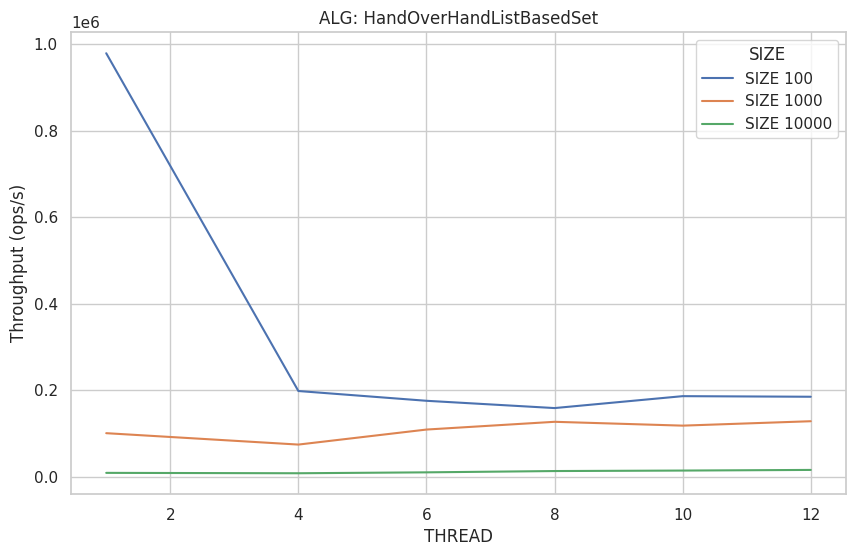

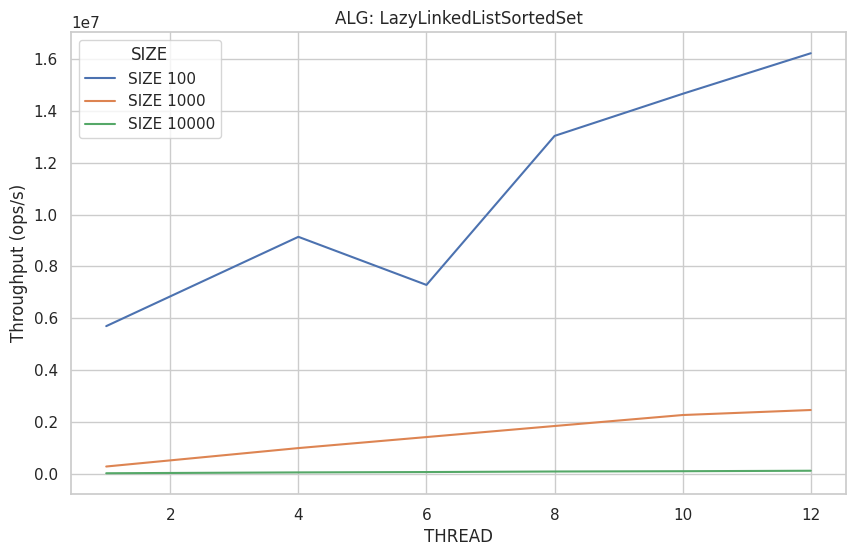

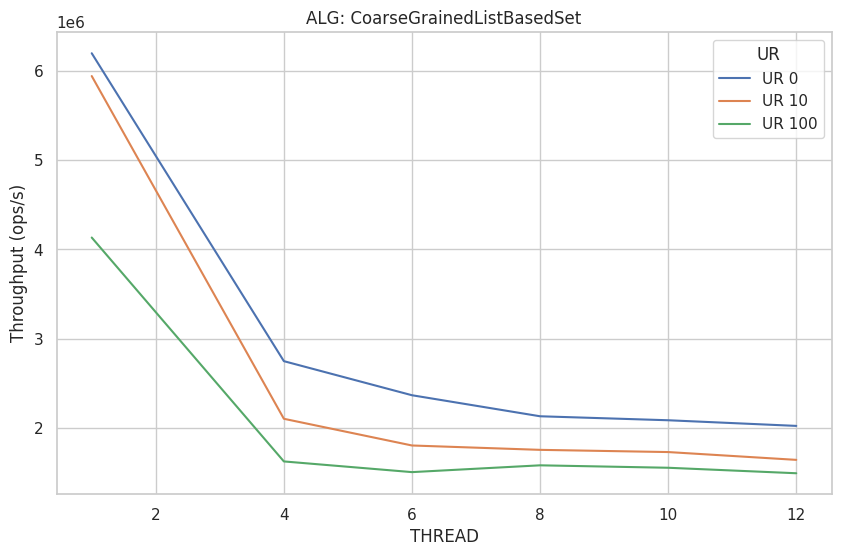

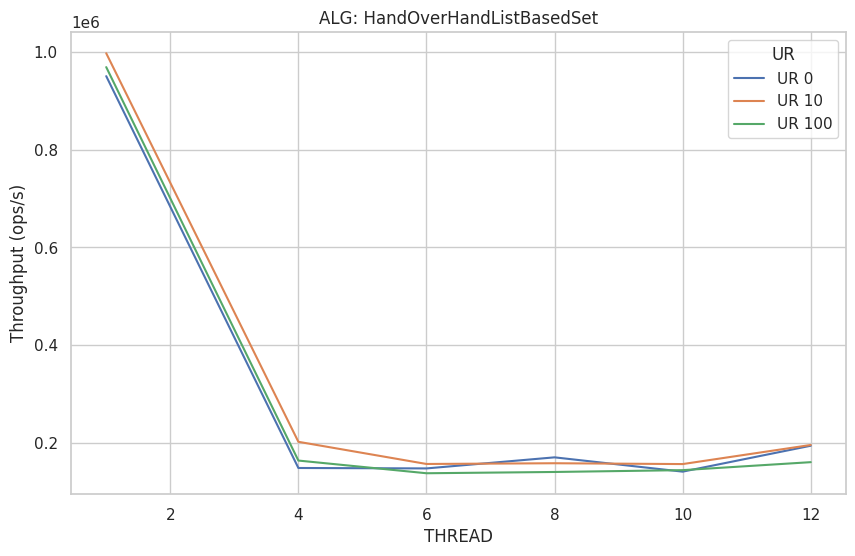

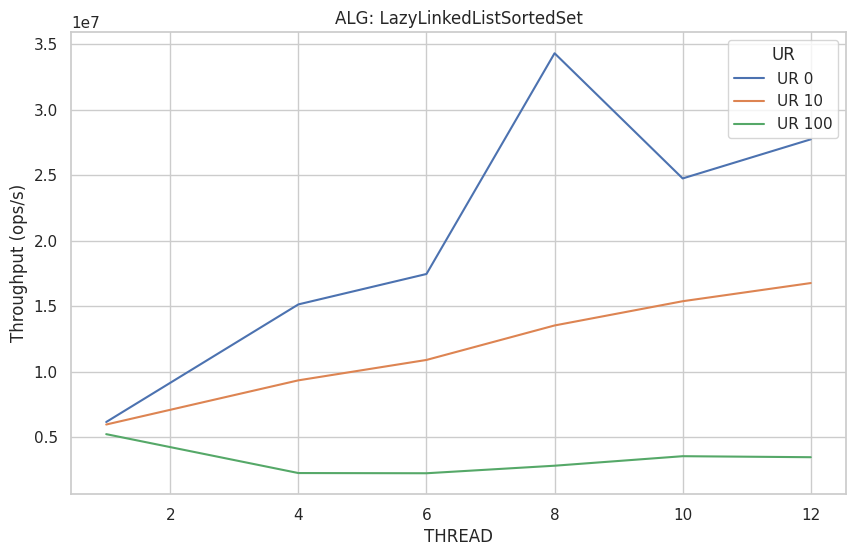

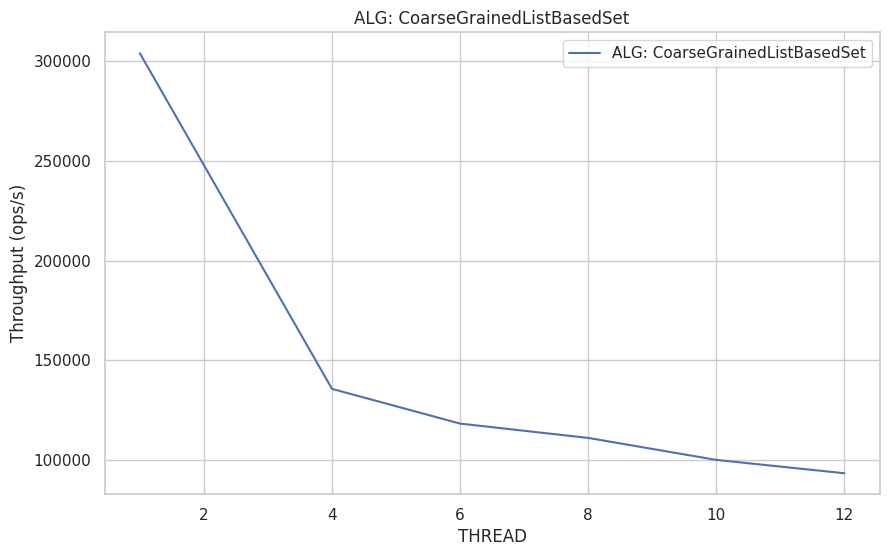

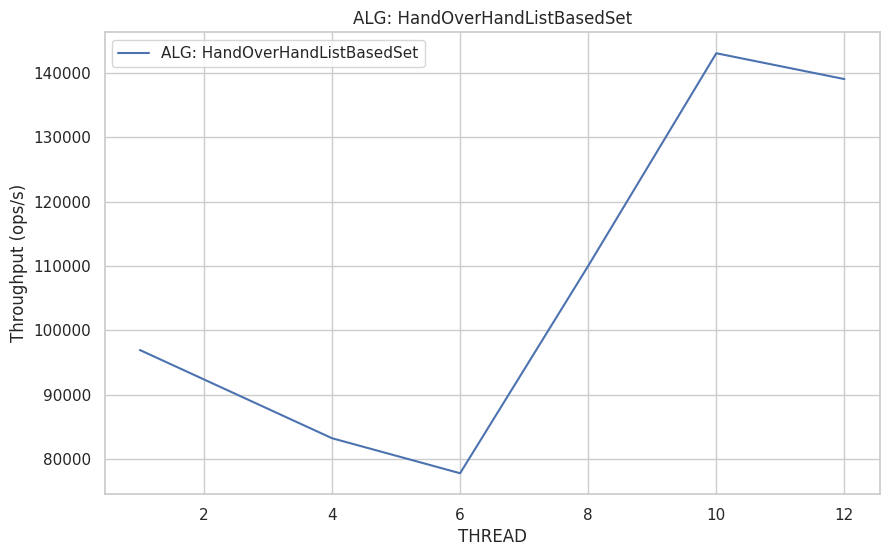

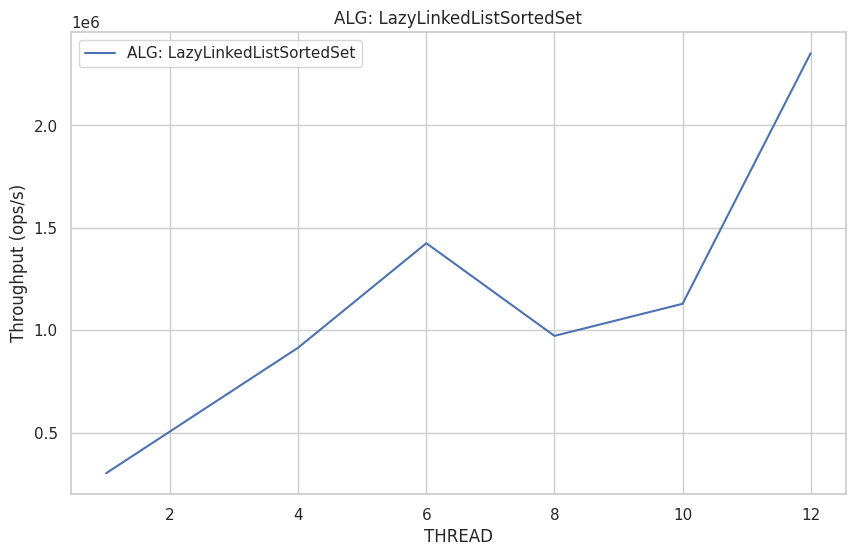

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Defina os parâmetros de estilo do seaborn
sns.set(style="whitegrid")

# Separe o DataFrame em três partes com base nos índices especificados
df1 = df[:54]  # Linhas 0 a 53
df2 = df[54:108]  # Linhas 54 a 107
df3 = df[108:]  # Linhas 108 a 125

# Primeira seção: 3 gráficos
for alg in df1['ALG'].unique():
    data = df1[df1['ALG'] == alg]
    plt.figure(figsize=(10, 6))
    for size in data['SIZE'].unique():
        sub_data = data[data['SIZE'] == size]
        sns.lineplot(data=sub_data, x='THREAD', y='Throughput (ops/s)', label=f'SIZE {size}')
    plt.title(f'ALG: {alg}')
    plt.xlabel('THREAD')
    plt.ylabel('Throughput (ops/s)')
    plt.legend(title='SIZE')
    plt.show()

# Segunda seção: 3 gráficos
for alg in df2['ALG'].unique():
    data = df2[df2['ALG'] == alg]
    plt.figure(figsize=(10, 6))
    for ur in data['UR'].unique():
        sub_data = data[data['UR'] == ur]
        sns.lineplot(data=sub_data, x='THREAD', y='Throughput (ops/s)', label=f'UR {ur}')
    plt.title(f'ALG: {alg}')
    plt.xlabel('THREAD')
    plt.ylabel('Throughput (ops/s)')
    plt.legend(title='UR')
    plt.show()

# Terceira seção: 1 gráfico
for alg in df3['ALG'].unique():
    data = df3[df3['ALG'] == alg]
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x='THREAD', y='Throughput (ops/s)', label=f'ALG: {alg}')
    plt.title(f'ALG: {alg}')
    plt.xlabel('THREAD')
    plt.ylabel('Throughput (ops/s)')
    plt.legend()
    plt.show()


In [23]:
import os

# Lista de nomes dos arquivos
# file_names = ['output1.txt', 'output2.txt', 'output3.txt', 'output4.txt', 'output5.txt']
file_names = ['output1.txt', 'output2.txt']

# Lista para armazenar os DataFrames de cada arquivo
dfs = []

# Loop para ler os arquivos e criar DataFrames
for file_name in file_names:
    with open(file_name, 'r') as file:
        lines = file.readlines()
    
    # Inicializa listas para armazenar os valores de cada coluna
    alg_list, thread_list, ur_list, size_list, throughput_list = [], [], [], [], []
    
    for line in lines:
        parts = line.split()
        alg_list.append(parts[1])
        thread_list.append(int(parts[3]))
        ur_list.append(int(parts[5]))
        size_list.append(int(parts[7]))
        throughput_list.append(float(parts[-1]))
    
    # Cria um DataFrame para o arquivo atual
    df = pd.DataFrame({
        'ALG': alg_list,
        'THREAD': thread_list,
        'UR': ur_list,
        'SIZE': size_list,
        'Throughput (ops/s)': throughput_list
    })
    
    # Adiciona o DataFrame à lista
    dfs.append(df)

# Concatena os DataFrames de todos os arquivos
combined_df = pd.concat(dfs)

# Calcula a média dos valores de Throughput (ops/s)
average_throughput = combined_df.groupby(['ALG', 'THREAD', 'UR', 'SIZE'])['Throughput (ops/s)'].mean().reset_index()

# Exibe o DataFrame resultante

pd.set_option('display.max_rows', len(combined_df))
print(combined_df)
pd.reset_option('display.max_rows')


                           ALG  THREAD   UR   SIZE  Throughput (ops/s)
0    CoarseGrainedListBasedSet       1   10    100        6.017723e+06
1    CoarseGrainedListBasedSet       4   10    100        2.058688e+06
2    CoarseGrainedListBasedSet       6   10    100        1.853545e+06
3    CoarseGrainedListBasedSet       8   10    100        1.788015e+06
4    CoarseGrainedListBasedSet      10   10    100        1.705011e+06
5    CoarseGrainedListBasedSet      12   10    100        1.648872e+06
6    CoarseGrainedListBasedSet       1   10   1000        2.937111e+05
7    CoarseGrainedListBasedSet       4   10   1000        1.321248e+05
8    CoarseGrainedListBasedSet       6   10   1000        1.221491e+05
9    CoarseGrainedListBasedSet       8   10   1000        1.075508e+05
10   CoarseGrainedListBasedSet      10   10   1000        1.003365e+05
11   CoarseGrainedListBasedSet      12   10   1000        9.670468e+04
12   CoarseGrainedListBasedSet       1   10  10000        1.444605e+04
13   C